### 1.Accuracy
### 2.Area under ROC curve
### 3.Confusion matrix
### 4.Classification Report

In [1]:
import pandas as pd
import numpy as np

In [2]:
hd = pd.read_html('https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/data/heart-disease.csv')

In [3]:
data = hd[0].iloc[:,1:]

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Feature and Target

In [7]:
featured_x = data.drop('target',axis=1)

target_y = data['target']

In [24]:
#creating train_test data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(featured_x,target_y)

In [ ]:
##############

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
clf = RandomForestClassifier()

In [28]:
## Fiting train_test data

In [29]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
#######################################

In [11]:
#### Cross_validation_score

In [14]:
np.random.seed(1)
cv_score = cross_val_score(clf,featured_x,target_y)

In [15]:
cv_score

array([0.80327869, 0.90163934, 0.80327869, 0.81666667, 0.76666667])

In [16]:
###################################
### Finding Accuracy##############
##################################

In [17]:
np.mean(cv_score) #accuracy

0.8183060109289617

In [19]:
print(f'Heart disease cross-validation accuracy: {np.mean(cv_score) * 100:.2f}%')

Heart disease cross-validation accuracy: 81.83%


In [21]:
##############################
#
#Area under ROC( Receiver operating Characteristic) curve
#
################################

* AUC curve
* ROC curve

In [22]:
#ROC is a comparison of a models true positive right (TPR ) vs False positive right (FPR)

* TPR = model predict 1 when truth is 1 
* FPR = model predict 1 when truth is 0
* True Negtive = model predict 0 when truth is 0 
* False Negative = model predict 0 when truth is 1 

In [27]:
from sklearn.metrics import roc_curve

In [31]:
y_probs = clf.predict_proba(x_test)
                            

In [42]:
y_probs[:5] #probability of target (0,1) (13% for choosing 0 and 87% for choosing 1)

array([[0.13, 0.87],
       [0.05, 0.95],
       [0.29, 0.71],
       [0.25, 0.75],
       [0.79, 0.21]])

In [36]:

y_probs_positive = y_probs[:,1]

In [37]:
y_probs_positive

array([0.87, 0.95, 0.71, 0.75, 0.21, 0.69, 0.32, 0.07, 0.72, 0.54, 0.2 ,
       0.34, 1.  , 0.29, 0.2 , 0.56, 0.08, 0.99, 0.01, 0.88, 0.53, 0.85,
       0.64, 0.88, 0.89, 0.07, 1.  , 0.9 , 0.31, 0.51, 0.45, 0.47, 0.34,
       0.61, 1.  , 0.64, 0.73, 0.85, 0.81, 0.85, 0.92, 0.32, 0.44, 0.83,
       0.51, 0.91, 0.86, 0.04, 0.73, 0.27, 0.77, 0.03, 0.74, 0.96, 0.12,
       0.96, 0.03, 0.08, 0.13, 0.45, 0.96, 0.22, 0.28, 0.13, 0.05, 0.44,
       0.57, 0.19, 0.44, 0.8 , 0.75, 0.99, 0.37, 0.08, 0.39, 0.49])

In [38]:
# fpr,trp,thresholds

In [39]:
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

In [41]:
fpr # false positive rate

array([0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.10344828, 0.10344828, 0.10344828,
       0.10344828, 0.10344828, 0.10344828, 0.10344828, 0.10344828,
       0.10344828, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.17241379, 0.20689655, 0.27586207,
       0.48275862, 0.51724138, 0.55172414, 0.62068966, 0.65517241,
       0.75862069, 0.82758621, 0.89655172, 0.96551724, 1.        ])

In [43]:
#Plotting the ROC Curve

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

In [51]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='blue',label='ROC')
    
    #plot line with no predictive power
    plt.plot([0,1],[0,1],color='red',linestyle='-.',label='Guess')
    
    ##
    plt.xlabel('False Positive Right',fontsize=12)
    plt.ylabel('True Positive Right',fontsize=12)
    plt.title('ROC CURVE',fontsize=14)
    
    plt.legend()
    plt.show()

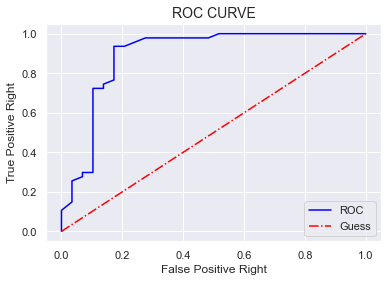

In [52]:
plot_roc_curve(fpr,tpr)

In [53]:
from sklearn.metrics import roc_auc_score #accuracy score

In [54]:
roc_auc_score(y_test,y_probs_positive)

0.892516507703595

In [55]:
#### Perfect ROC curve will be like

In [56]:
fpr2,tpr2,thresholds2 = roc_curve(y_test,y_test)

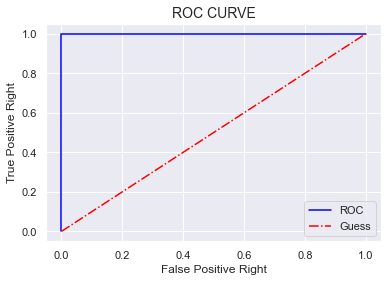

In [57]:
plot_roc_curve(fpr2,tpr2)

In [58]:
roc_auc_score(y_test,y_test)

1.0